Peak times: [0.0002 0.0068 0.0136 0.0202 0.0272 0.034  0.0408 0.0476 0.0544 0.0612
 0.068  0.0748 0.0818 0.0882 0.095  0.1014 0.1084 0.1156 0.1226 0.1292]
Peak values: [1.1174  0.83615 0.68615 0.5799  0.48615 0.4299  0.3799  0.3299  0.2799
 0.2549  0.2299  0.2049  0.18615 0.1674  0.13615 0.1299  0.1299  0.1174
 0.09865 0.09865]
20
m = 0.8255256323489631 +- 0.019054762049019083 V
n = 55.856434700332244 +- 0.9727534777265633 ms
Chi2       = 77.65781429205843
dof        = 18
Chi2_red   = 4.314323016225469


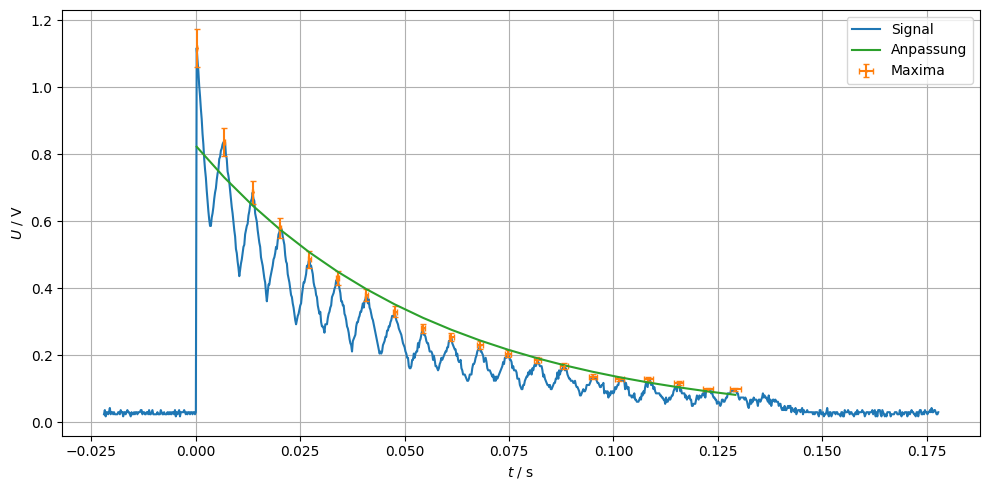

In [1]:
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt

# Load your data
data = np.loadtxt("../data/print_003.csv", delimiter=",", skiprows=2)
t = data[:,0]
V = data[:,1]

# Find peaks
peaks, properties = find_peaks(V, prominence=0.05, distance=20)

# Extract peak positions
t_peaks = t[peaks]
V_peaks = V[peaks]

# trimmed
#t_peaks = t_peaks[2:]
#V_peaks = V_peaks[2:]

print("Peak times:", t_peaks)
print("Peak values:", V_peaks)

dt_peaks=0.01*abs(t_peaks)
#dU=0.02*abs(U)
#dtau = [0.1]*len(tau)
#dV_peaks = [0.02]*len(V_peaks)
dV_peaks = 0.05*V_peaks
print(len(t_peaks))

def f(x,m,n):
    return m*(np.exp(-x/n))

#guess=[max(V_peaks),20.0]
#guess=[max(V_peaks), (t_peaks[-1] - t_peaks[0]) / 2]
guess = [V_peaks[0], (t_peaks[-1] - t_peaks[0]) / 3]

popt, pcov=curve_fit(f,t_peaks,V_peaks,p0=guess,sigma=dV_peaks,absolute_sigma=True)
perr=np.sqrt(np.diag(pcov))

print("m =", popt[0], "+-", perr[0], "V")
print("n =", popt[1]*10**3, "+-", perr[1]*10**3, "ms")
#print('a =', popt[2], "+-", perr[2])
# compute chi-square
chi2 = np.sum(((V_peaks - f(t_peaks, *popt)) / dV_peaks)**2)

# degrees of freedom = number of data points - number of parameters
dof = len(t_peaks) - len(popt)

chi2_red = chi2 / dof

print("Chi2       =", chi2)
print("dof        =", dof)
print("Chi2_red   =", chi2_red)

# Plot to verify
plt.figure(figsize=(10,5))
plt.plot(t, V, label="Signal")
plt.errorbar(t_peaks, V_peaks,xerr=dt_peaks, yerr=dV_peaks,fmt='.', capsize=2,markersize=2, label="Maxima")
plt.plot(t_peaks,f(t_peaks,*popt), zorder=2, label='Anpassung')
plt.grid(which='minor')
plt.grid(which='major')
plt.xlabel(r'$t$ / s')
plt.ylabel(r'$U$ / V')
plt.tight_layout()
plt.legend()
plt.savefig('../plots/carr_purcell.pdf')
plt.show()


In [2]:
# dataframe
df = pd.DataFrame({
    r'$\tau$':t_peaks,
    r'$d\tau$':dt_peaks,
    r'$U$ / mV':V_peaks,
    r'$dU$ / mV':dV_peaks
})
print(df.to_latex(index=False))

\begin{tabular}{rrrr}
\toprule
$\tau$ & $d\tau$ & $U$ / mV & $dU$ / mV \\
\midrule
0.000200 & 0.000002 & 1.117400 & 0.055870 \\
0.006800 & 0.000068 & 0.836150 & 0.041807 \\
0.013600 & 0.000136 & 0.686150 & 0.034308 \\
0.020200 & 0.000202 & 0.579900 & 0.028995 \\
0.027200 & 0.000272 & 0.486150 & 0.024308 \\
0.034000 & 0.000340 & 0.429900 & 0.021495 \\
0.040800 & 0.000408 & 0.379900 & 0.018995 \\
0.047600 & 0.000476 & 0.329900 & 0.016495 \\
0.054400 & 0.000544 & 0.279900 & 0.013995 \\
0.061200 & 0.000612 & 0.254900 & 0.012745 \\
0.068000 & 0.000680 & 0.229900 & 0.011495 \\
0.074800 & 0.000748 & 0.204900 & 0.010245 \\
0.081800 & 0.000818 & 0.186150 & 0.009308 \\
0.088200 & 0.000882 & 0.167400 & 0.008370 \\
0.095000 & 0.000950 & 0.136150 & 0.006808 \\
0.101400 & 0.001014 & 0.129900 & 0.006495 \\
0.108400 & 0.001084 & 0.129900 & 0.006495 \\
0.115600 & 0.001156 & 0.117400 & 0.005870 \\
0.122600 & 0.001226 & 0.098650 & 0.004933 \\
0.129200 & 0.001292 & 0.098650 & 0.004933 \\
\bottomrule
\end{